In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA


C:\Users\MG\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
departures_data = pd.read_csv('International_Report_Departures.csv')
passengers_data = pd.read_csv('International_Report_Passengers.csv')

print("Passengers Data:")
print(passengers_data.head())

print("\nDepartures Data:")
print(departures_data.head())


Passengers Data:
     data_dte  Year  Month  usg_apt_id usg_apt  usg_wac  fg_apt_id fg_apt  \
0  05/01/2014  2014      5       14492     RDU       36      11032    CUN   
1  06/01/2007  2007      6       13204     MCO       33      16085    YHZ   
2  12/01/2005  2005     12       11433     DTW       43      10411    AUA   
3  04/01/2003  2003      4       13487     MSP       63      16304    ZIH   
4  12/01/2005  2005     12       12016     GUM        5      11138    CRK   

   fg_wac  airlineid carrier  carriergroup        type  Scheduled  Charter  \
0     148      19534      AM             0  Passengers          0      315   
1     951      20364      C6             0  Passengers          0      683   
2     277      20344      RD             1  Passengers          0     1010   
3     148      20204      MG             1  Passengers          0      508   
4     766      20312      TZ             1  Passengers          0       76   

   Total  
0    315  
1    683  
2   1010  
3    50

In [14]:
# Summary statistics for passengers data
print("Passengers Data Summary:")
print(passengers_data.describe())

# Summary statistics for departures data
print("\nDepartures Data Summary:")
print(departures_data.describe())

Passengers Data Summary:
                Year          Month     usg_apt_id        usg_wac  \
count  680985.000000  680985.000000  680985.000000  680985.000000   
mean     2006.141110       6.366576   12779.103825      44.394527   
std         8.716122       3.466745    2510.939346      28.110753   
min      1990.000000       1.000000   10010.000000       1.000000   
25%      1999.000000       3.000000   11618.000000      22.000000   
50%      2007.000000       6.000000   12889.000000      33.000000   
75%      2014.000000       9.000000   13796.000000      74.000000   
max      2020.000000      12.000000   99999.000000      93.000000   

           fg_apt_id         fg_wac      airlineid   carriergroup  \
count  680985.000000  680985.000000  680985.000000  680985.000000   
mean    13493.331869     468.122264   20031.610461       0.562233   
std      1955.917890     292.799407     510.270976       0.496112   
min     10125.000000     106.000000   19386.000000       0.000000   
25%     

In [3]:
departures_data.dropna(inplace=True)
passengers_data.dropna(inplace=True)


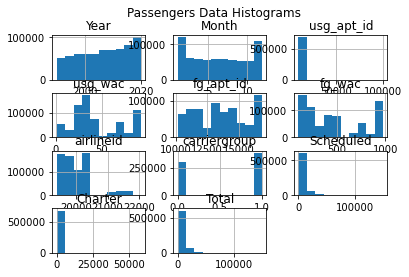

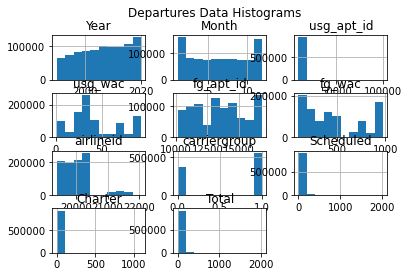

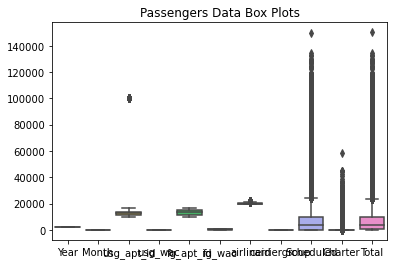

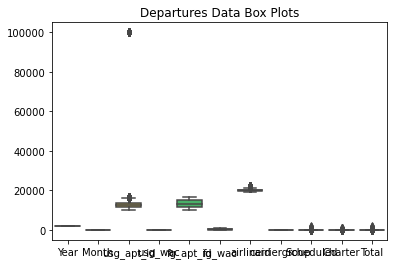

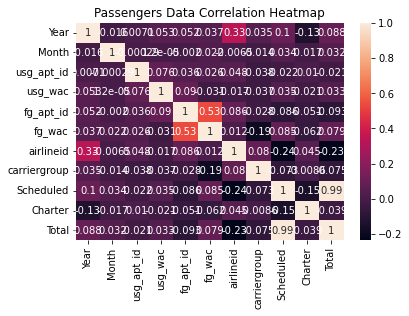

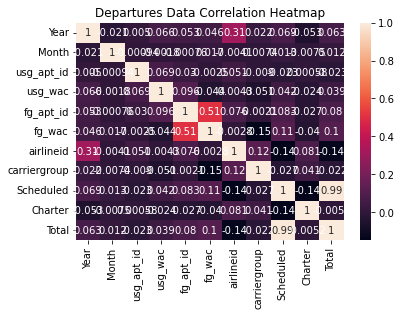

In [15]:
# Histograms of numerical variables in passengers data
passengers_data.hist()
plt.suptitle("Passengers Data Histograms")
plt.show()

# Histograms of numerical variables in departures data
departures_data.hist()
plt.suptitle("Departures Data Histograms")
plt.show()

# Box plots to visualize distribution and outliers in passengers data
sns.boxplot(data=passengers_data)
plt.title("Passengers Data Box Plots")
plt.show()

# Box plots for departures data
sns.boxplot(data=departures_data)
plt.title("Departures Data Box Plots")
plt.show()

# Correlation heatmap for passengers data
passengers_corr = passengers_data.corr()
sns.heatmap(passengers_corr, annot=True)
plt.title("Passengers Data Correlation Heatmap")
plt.show()

# Correlation heatmap for departures data
departures_corr = departures_data.corr()
sns.heatmap(departures_corr, annot=True)
plt.title("Departures Data Correlation Heatmap")
plt.show()

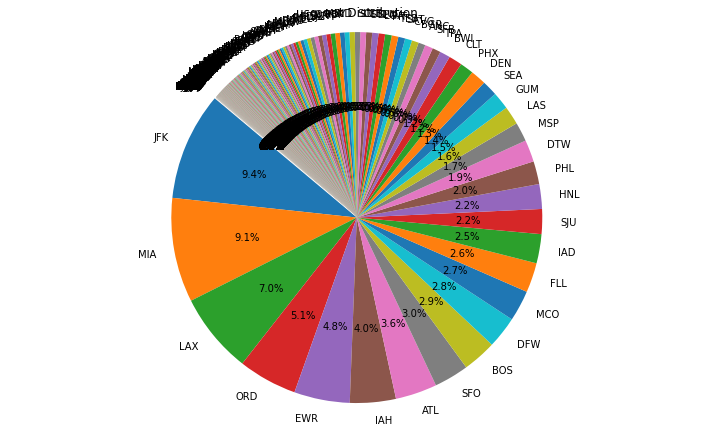

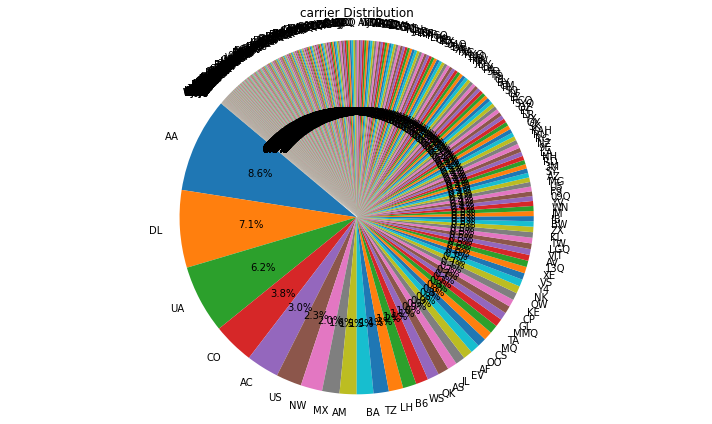

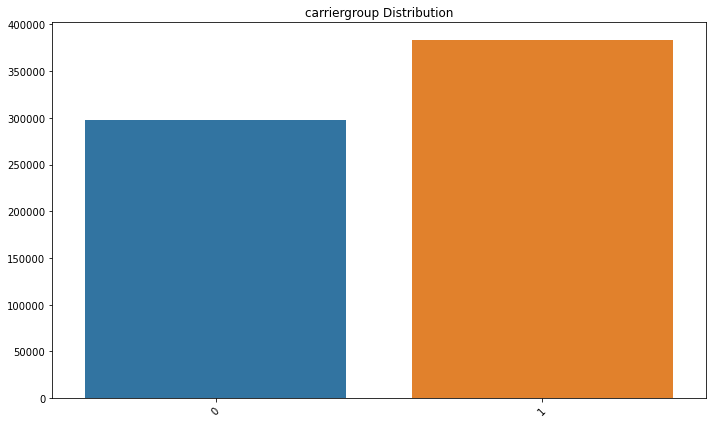

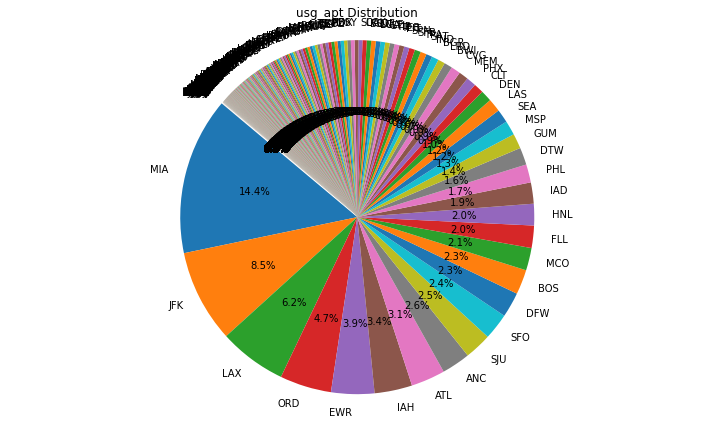

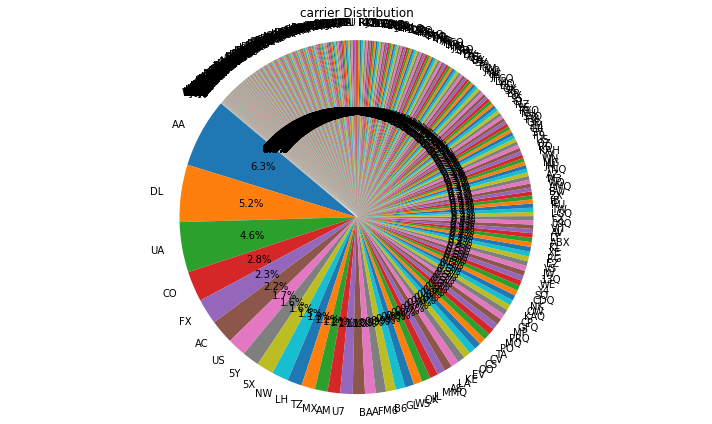

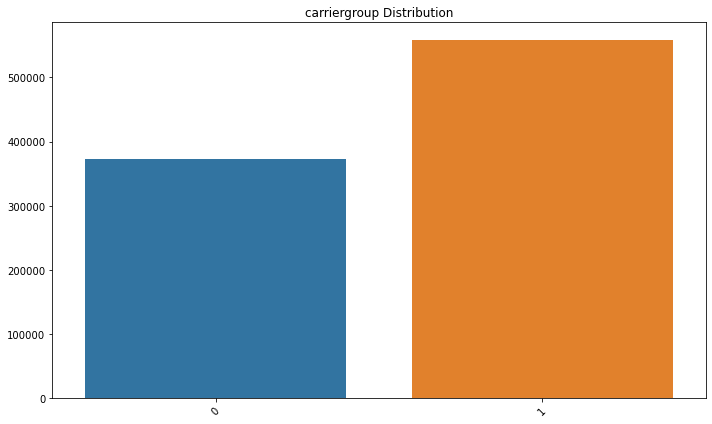

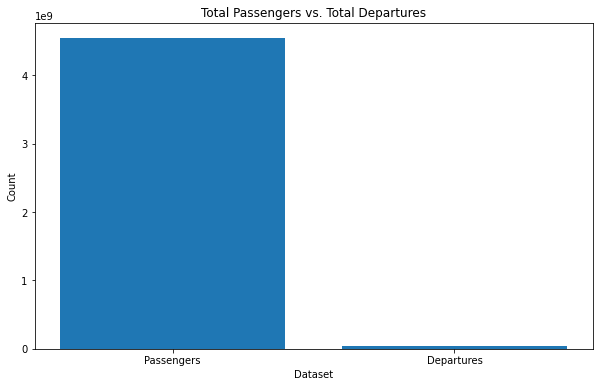

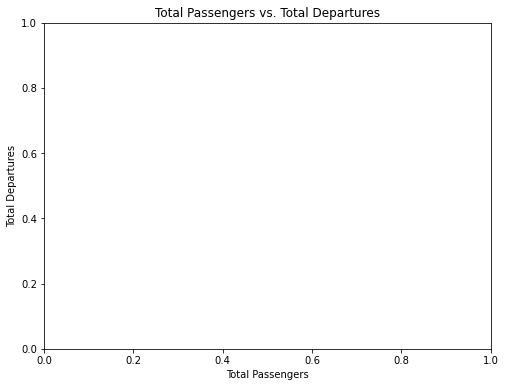

In [17]:
# Explore categorical variables using bar plots or pie charts
def explore_categorical(data, column):
    value_counts = data[column].value_counts()
    
    plt.figure(figsize=(10, 6))
    if len(value_counts) <= 10:
        # Use bar plot for a small number of unique values
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.xticks(rotation=45)
    else:
        # Use pie chart for a larger number of unique values
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
    
    plt.title(f"{column} Distribution")
    plt.tight_layout()
    plt.show()
    
    # Explore categorical variables in passengers data
categorical_columns = ["usg_apt", "carrier", "carriergroup"]
for column in categorical_columns:
    explore_categorical(passengers_data, column)

# Explore categorical variables in departures data
for column in categorical_columns:
    explore_categorical(departures_data, column)

# Compare features between the two datasets
plt.figure(figsize=(10, 6))
plt.bar(["Passengers", "Departures"], [passengers_data["Total"].sum(), departures_data["Total"].sum()])
plt.title("Total Passengers vs. Total Departures")
plt.xlabel("Dataset")
plt.ylabel("Count")
plt.show()

# Investigate relationships between variables using scatter plots
plt.figure(figsize=(8, 6))
# plt.scatter(passengers_data["Total"], departures_data["Total"])
plt.title("Total Passengers vs. Total Departures")
plt.xlabel("Total Passengers")
plt.ylabel("Total Departures")
plt.show()


    

In [4]:
label_encoder = LabelEncoder()
passengers_data['carrier_encoded'] = label_encoder.fit_transform(passengers_data['carrier'])


In [5]:
scaler = StandardScaler()
scaled_passengers_data = scaler.fit_transform(passengers_data[['Year', 'Month', 'Total']])


In [6]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_passengers_data)


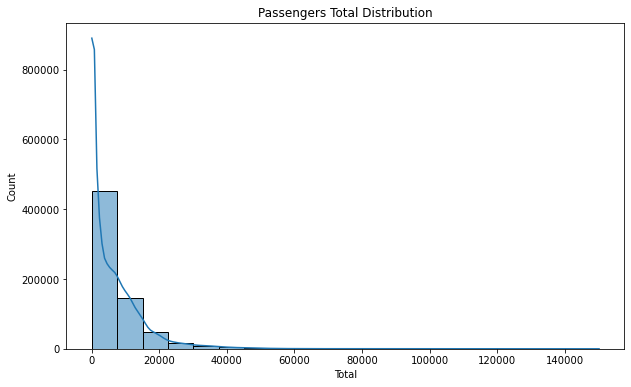

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=passengers_data, x='Total', bins=20, kde=True)
plt.title('Passengers Total Distribution')
plt.show()


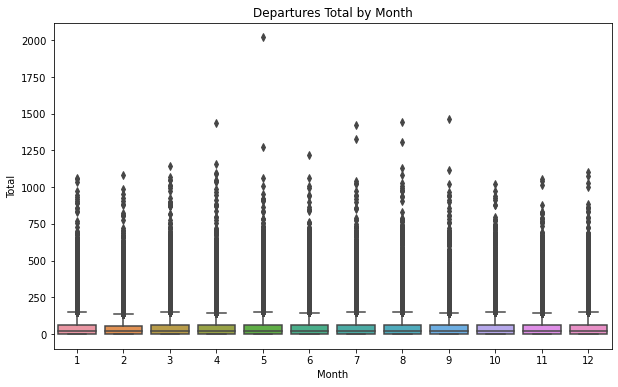

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=departures_data, x='Month', y='Total')
plt.title('Departures Total by Month')
plt.show()


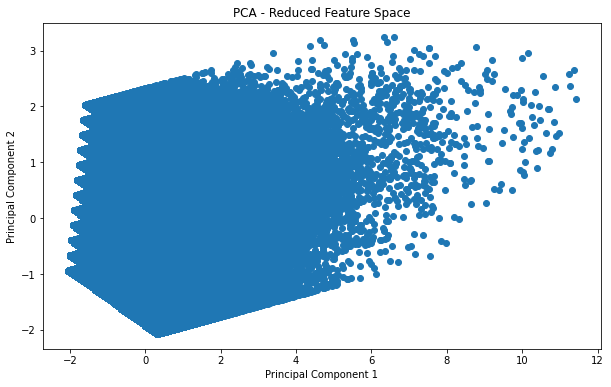

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Reduced Feature Space')
plt.show()


In [12]:
import argparse

parser = argparse.ArgumentParser(description='Automated EDA Tool')
parser.add_argument('--departures', required=True, help='Path to Departures CSV file')
parser.add_argument('--passengers', required=True, help='Path to Passengers CSV file')
args = parser.parse_args()

departures_data = pd.read_csv(args.departures)
passengers_data = pd.read_csv(args.passengers)


usage: ipykernel_launcher.py [-h] --departures DEPARTURES --passengers PASSENGERS
ipykernel_launcher.py: error: the following arguments are required: --departures, --passengers


SystemExit: 2

C:\Users\MG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
